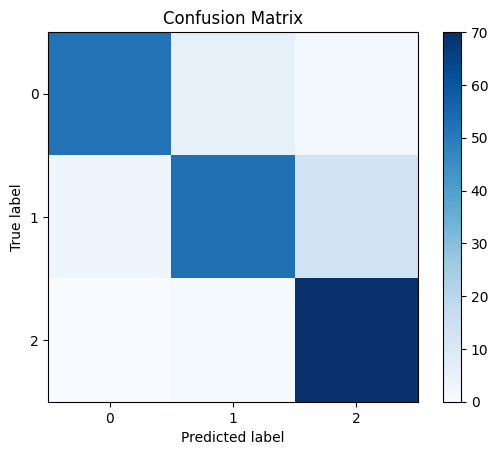

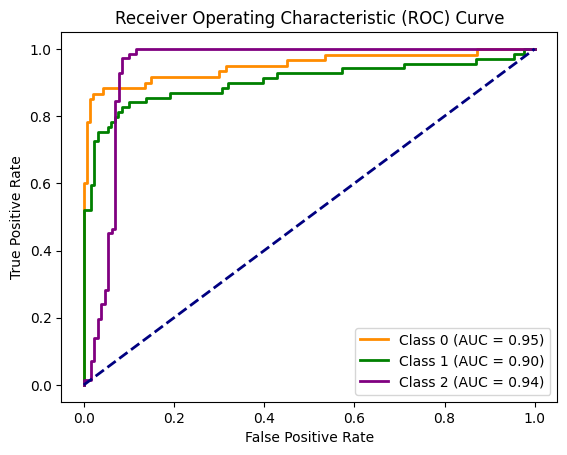

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


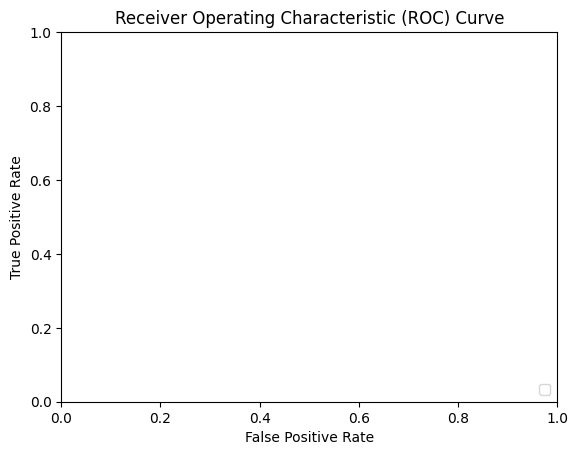

Confusion Matrix:
 [[52  6  2]
 [ 3 53 13]
 [ 0  1 70]]
Accuracy: 0.875
Error Rate: 0.125
Sensitivity:  [0.86666667 0.76811594 0.98591549]
Specificity:  [0.5, 0.5, 0.5]
Precision:  [0.94545455 0.88333333 0.82352941]
F-measure: 0.874
AUC:  {0: 0.9507142857142856, 1: 0.9036397831618541, 2: 0.942351785129381}


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=3, random_state=2)

# Split the dataset into training and test sets using the holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the model accuracy and error rate
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

# Compute sensitivity, specificity, precision, and recall for each class
sensitivity = recall_score(y_test, y_pred, average=None)
specificity = []
precision = precision_score(y_test, y_pred, average=None)
for i in range(lr.classes_.size):
    not_i = [j for j in range(lr.classes_.size) if j != i]
    tn_i = np.sum([cm[j, k] for j in not_i for k in not_i])
    fp_i = np.sum([cm[j, i] for j in not_i])
    tn_i = np.sum([cm[i, j] for j in not_i])
    fp_i = np.sum([cm[i, j] for j in not_i])
    specificity.append(tn_i / (tn_i + fp_i))

# Compute the F-measure
f_measure = f1_score(y_test, y_pred, average='macro')

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(lr.classes_.size):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, lr.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(lr.classes_.size), lr.classes_)
plt.yticks(np.arange(lr.classes_.size), lr.classes_)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot the ROC curve
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='Class 0 (AUC = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', lw=2, label='Class 1 (AUC = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='purple', lw=2, label='Class 2 (AUC = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add labels and legend to the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print all performance metrics
print("Confusion Matrix:\n", cm)
print("Accuracy: {:.3f}".format(accuracy))
print("Error Rate: {:.3f}".format(error_rate))
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("F-measure: {:.3f}".format(f_measure))
print("AUC: ", roc_auc)

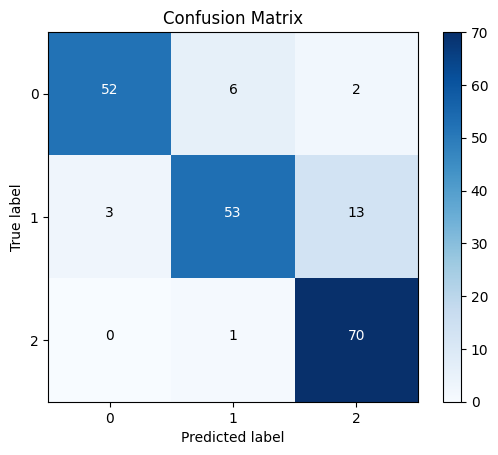

In [8]:
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(lr.classes_.size), lr.classes_)
plt.yticks(np.arange(lr.classes_.size), lr.classes_)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
for i in range(lr.classes_.size):
    for j in range(lr.classes_.size):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.show()
